In [22]:
import pandas as pd
import matplotlib as plt
import numpy as np
import datetime as dt
import seaborn as sns 

# read data
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [2]:
# review data
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [5]:
# sort trip distance from max to min
sorted_distance = df.sort_values(by='trip_distance', ascending=False)
for total_distance in sorted_distance['trip_distance'].head(20):
    print(total_distance)

33.96
33.92
32.72
31.95
30.83
30.5
30.33
28.23
28.2
27.97
27.88
27.34
27.2
26.86
26.54
26.39
26.2
26.12
26.12
25.86


In [6]:
# sort total fair amount from max to min
sorted_total = df.sort_values(by='total_amount', ascending=False)

for total_amount in sorted_total['total_amount'].head(20):
    print(total_amount)

1200.29
450.3
258.21
233.74
211.8
179.06
157.06
152.3
151.82
150.3
137.8
131.8
126.0
123.3
121.56
120.96
119.31
115.94
111.95
111.38


In [7]:
# sort total fair amount from min to max 
sorted_total = df.sort_values(by='total_amount', ascending=True)

for total_amount in sorted_total['total_amount'].head(20):
    print(total_amount)

-120.3
-5.8
-5.8
-5.3
-5.3
-4.8
-4.8
-4.3
-4.3
-4.3
-3.8
-3.8
-3.8
-3.3
0.0
0.0
0.0
0.0
0.3
0.31


In [8]:
# sort by payment type
payment_count = df['payment_type'].value_counts()

for payment_type, count in payment_count.items():
    print("Payment Type:", payment_type)
    print("Count:", count)

Payment Type: 1
Count: 15265
Payment Type: 2
Count: 7267
Payment Type: 3
Count: 121
Payment Type: 4
Count: 46


In [9]:
# sort by vendor ID

vendor_count = df['VendorID'].value_counts()

for vendor_id, count in vendor_count.items():
    print("VendorID:", vendor_id)
    print("Count:", count)

VendorID: 2
Count: 12626
VendorID: 1
Count: 10073


In [10]:
# average for each vendor ID
mean_amounts = df.groupby('VendorID')['total_amount'].mean()

for vendor_id, mean_amount in mean_amounts.items():
    print("VendorID:", vendor_id)
    print("Mean Total Amount:", mean_amount)

VendorID: 1
Mean Total Amount: 16.298118733247296
VendorID: 2
Mean Total Amount: 16.32038175194044


In [11]:
# count of credit card fairs for each passenger count

credit_card_payments = df[df['payment_type'] == 1]

print(credit_card_payments)

count_by_passenger = credit_card_payments.groupby('passenger_count').size()

for passenger_count, count in count_by_passenger.items():
    print("Passenger Count:", passenger_count)
    print("Credit Card Payments Count:", count)

       Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0        24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3        38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
5        23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
...           ...       ...                     ...                     ...   
22692    60425673         1   07/16/2017 3:22:51 AM   07/16/2017 3:40:52 AM   
22693    67858616         2  08/10/2017 10:20:04 PM  08/10/2017 10:29:31 PM   
22695    66632549         2   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22697    60217333         2  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22698    17208911         1   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

       passenger_count  trip_distance  RatecodeID s

In [18]:
# average tip for fairs paid by credit card (credit card is payment type: 1)
average_tip_by_passenger = credit_card_payments.groupby('passenger_count')['tip_amount'].mean()

for passenger_count, average_tip in average_tip_by_passenger.items():
    print("Passenger Count:", passenger_count)
    print("Average Tip:", average_tip)

Passenger Count: 0
Average Tip: 0.0
Passenger Count: 1
Average Tip: 0.0
Passenger Count: 2
Average Tip: 0.0
Passenger Count: 3
Average Tip: 0.0
Passenger Count: 4
Average Tip: 0.0
Passenger Count: 5
Average Tip: 0.0
Passenger Count: 6
Average Tip: 0.0


In [19]:
# count of cash fairs for each passenger count

credit_card_payments = df[df['payment_type'] == 2]

print(credit_card_payments)

count_by_passenger = credit_card_payments.groupby('passenger_count').size()

for passenger_count, count in count_by_passenger.items():
    print("Passenger Count:", passenger_count)
    print("Cash Payments Count:", count)

       Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
4        30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
8         8433159         2   02/04/2017 4:17:07 PM   02/04/2017 4:29:14 PM   
18       35388828         2   04/10/2017 6:12:58 PM   04/10/2017 6:17:39 PM   
20      110690689         1  12/30/2017 11:52:44 PM  12/30/2017 11:58:57 PM   
27       99525452         2  11/24/2017 10:48:13 AM  11/24/2017 10:52:57 AM   
...           ...       ...                     ...                     ...   
22673    58511484         1   07/09/2017 5:25:16 PM   07/09/2017 5:29:16 PM   
22675    58407519         1   07/09/2017 9:09:10 AM   07/09/2017 9:15:31 AM   
22688    66450599         2   08/05/2017 9:23:29 PM   08/05/2017 9:26:11 PM   
22694    14873857         2   02/24/2017 5:37:23 PM   02/24/2017 5:40:39 PM   
22696    74239933         2   09/04/2017 2:54:14 PM   09/04/2017 2:58:22 PM   

       passenger_count  trip_distance  RatecodeID s

In [20]:
# average tip for fairs paid by cash (credit card is payment type: 2)
average_tip_by_passenger = credit_card_payments.groupby('passenger_count')['tip_amount'].mean()

for passenger_count, average_tip in average_tip_by_passenger.items():
    print("Passenger Count:", passenger_count)
    print("Average Tip:", average_tip)

Passenger Count: 0
Average Tip: 0.0
Passenger Count: 1
Average Tip: 0.0
Passenger Count: 2
Average Tip: 0.0
Passenger Count: 3
Average Tip: 0.0
Passenger Count: 4
Average Tip: 0.0
Passenger Count: 5
Average Tip: 0.0
Passenger Count: 6
Average Tip: 0.0


<Axes: xlabel='trip_distance'>

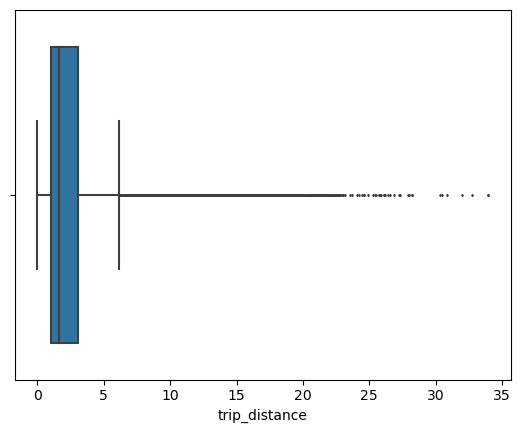

In [23]:
# visualization of trip distance

sns.boxplot(x=df['trip_distance'], fliersize=1)

<Axes: xlabel='total_amount', ylabel='trip_distance'>

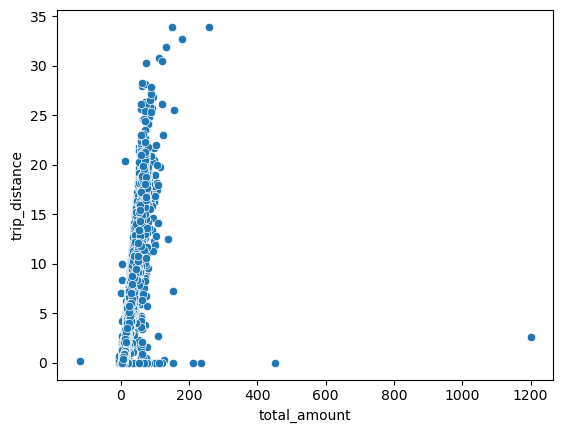

In [24]:
# remove trips with cost but trip distance = 0
# visualize trip distance compared to trip total amount

df_2 = df['trip_distance'].loc[~(df==0).all(axis=1)]

sns.scatterplot(x=df['total_amount'], y=df_2)